In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [46]:
# Load processed dataset
df = pd.read_csv('../data/processed/hourly_features_data.csv', parse_dates=['timestamp'], index_col='timestamp')
df.head()

,Studer Output Frequency - L1,Studer Output Frequency - L2,Studer Output Frequency - L3,Grid Input Frequency - L1,Grid Input Frequency - L2,Grid Input Frequency - L3,Grid Input Voltage - L2,Grid Input Voltage - L3,Studer Grid Status - L1,Studer Grid Status - L2,...,Imported from Grid (Wh)_lag72,Imported from Grid (Wh)_roll_mean_3,Imported from Grid (Wh)_roll_std_3,Imported from Grid (Wh)_roll_mean_6,Imported from Grid (Wh)_roll_std_6,Imported from Grid (Wh)_roll_mean_24,Imported from Grid (Wh)_roll_std_24,weather_severity,weather_intensity,weather_impact
timestamp,,,,,,,,,,,,,,,,,,,,,
2023-09-08 06:00:00,49.933333,49.933333,49.933333,49.933833,49.933333,49.932833,250.133333,247.350000,1.0,1.0,...,70.25,86.500000,10.213349,90.083333,7.897257,58.833333,41.866160,1,1.0,1.0
2023-09-08 08:00:00,50.033000,50.033500,50.033500,50.033500,50.033500,50.032000,249.366667,241.983333,1.0,1.0,...,73.00,43.166667,38.697814,68.291667,36.852889,56.718750,43.524126,1,1.0,1.0
2023-09-08 09:00:00,50.029000,50.029500,50.028500,50.028500,50.029500,50.027500,248.883333,246.233333,1.0,1.0,...,67.50,18.250000,31.609927,52.375000,42.881450,56.604167,43.675739,1,1.0,1.0
2023-09-08 10:00:00,50.040500,50.041000,50.040500,50.041000,50.040500,50.040500,252.850000,247.766667,1.0,1.0,...,73.25,0.000000,0.000000,37.125000,42.452547,56.604167,43.675739,1,1.0,1.0
2023-09-08 11:00:00,50.019000,50.019500,50.019000,50.019000,50.019500,50.018000,253.066667,247.833333,1.0,1.0,...,65.50,0.000000,0.000000,21.583333,34.029644,56.604167,43.675739,1,1.0,1.0


In [47]:
# Define target variables
targets = [
    'Energy Produced (Wh)',
    'Energy Consumed (Wh)',
    'net_export_import_grid'
]

In [48]:
# Forecast horizon (e.g., next 2 days if hourly)
forecast_horizon = 48

In [49]:
# Function to calculate SMAPE
def smape(y_true, y_pred):
    denominator = (np.abs(y_true) + np.abs(y_pred)) / 2.0
    diff = np.abs(y_true - y_pred) / denominator
    diff[denominator == 0] = 0.0
    return np.mean(diff) * 100

In [50]:
results_summary = []


Forecasting: Energy Produced (Wh)


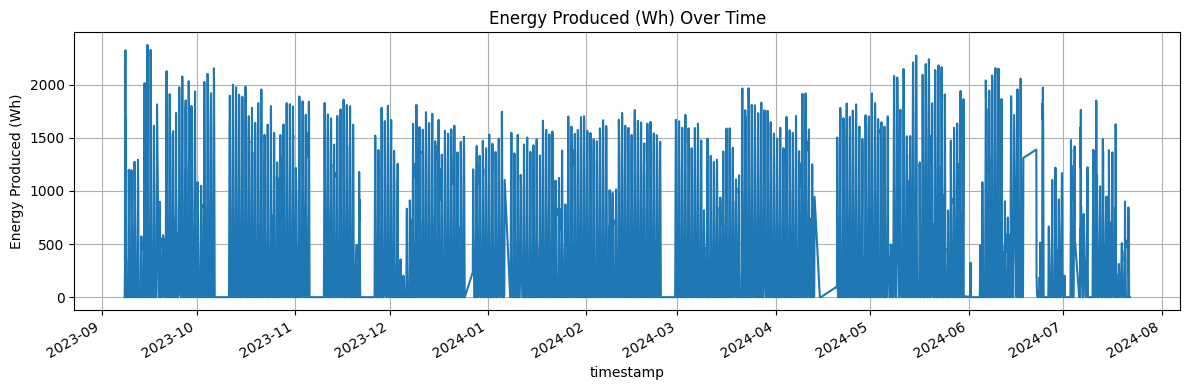

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

MAE: 228.81
RMSE: 331.00
SMAPE: 198.04%
R² Score: -0.692


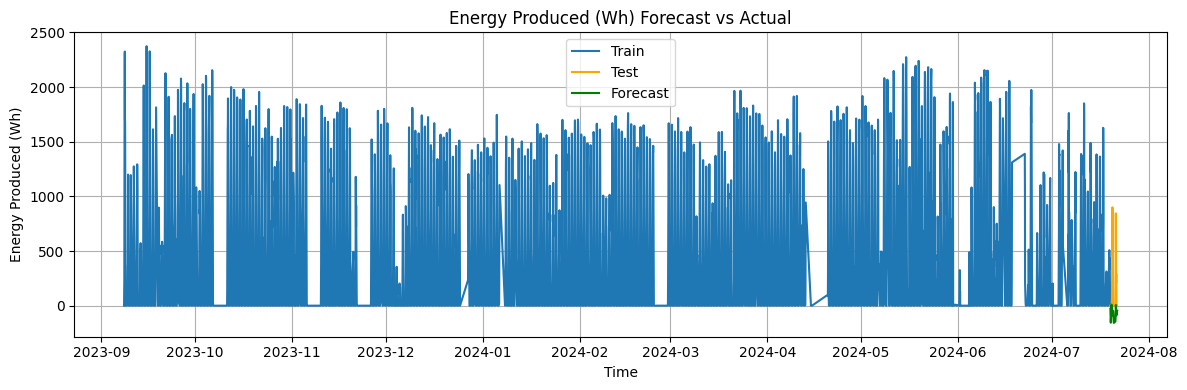


Forecasting: Energy Consumed (Wh)


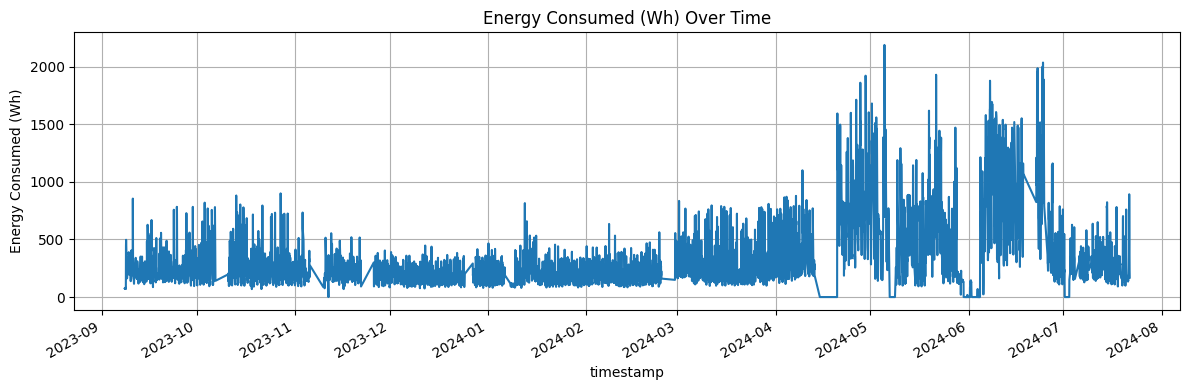

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

MAE: 138.46
RMSE: 208.47
SMAPE: 43.84%
R² Score: -0.100


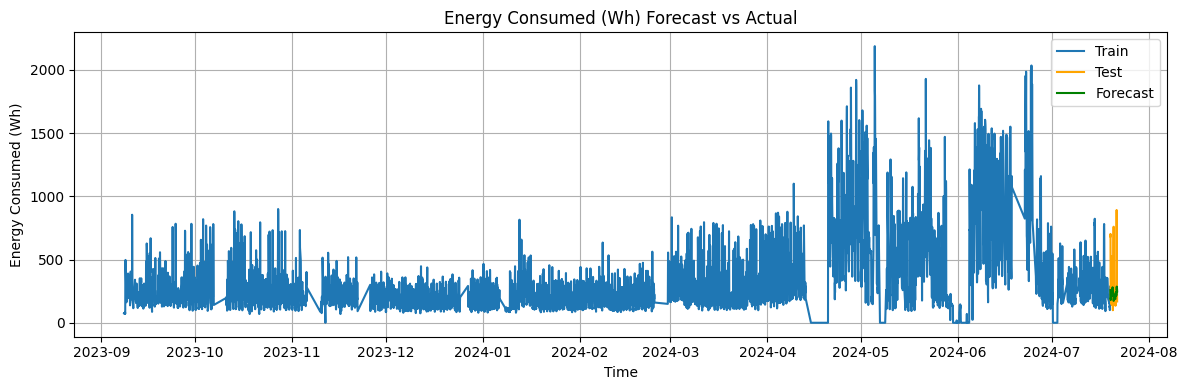


Forecasting: net_export_import_grid


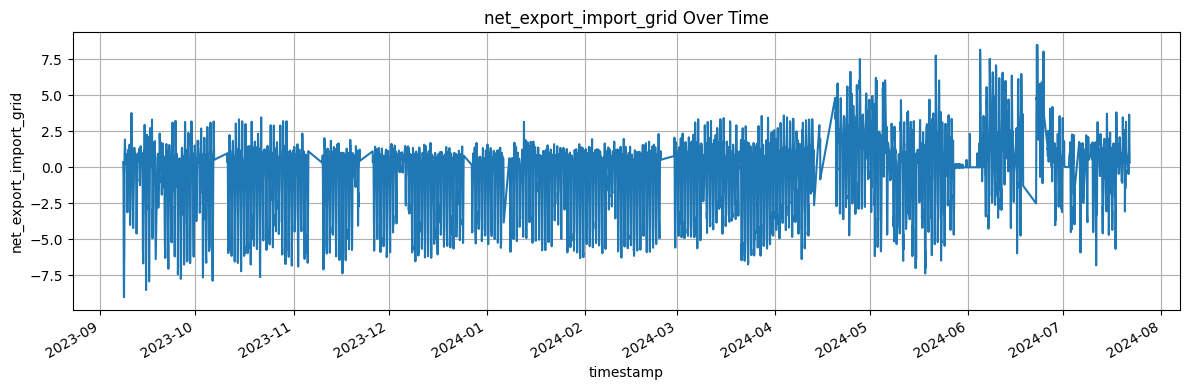

c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\burha\.conda\envs\mrp\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an excepti

MAE: 1.46
RMSE: 1.70
SMAPE: 112.97%
R² Score: -0.762


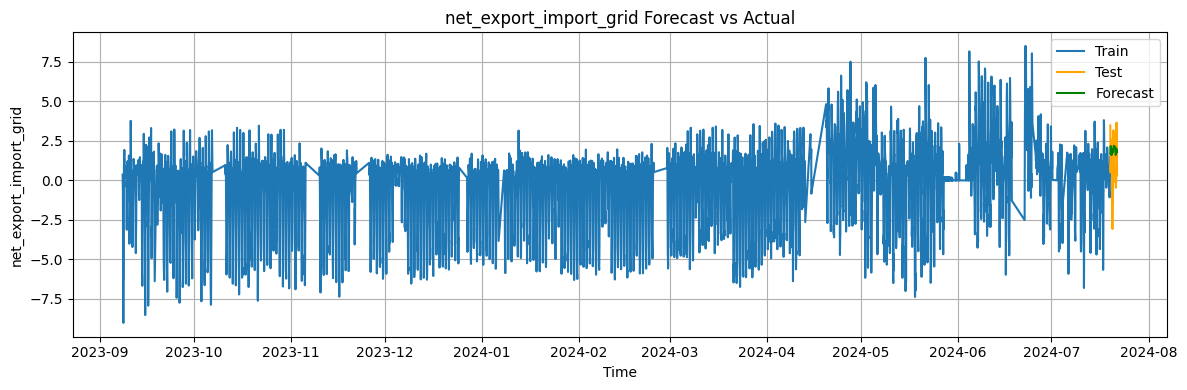

In [51]:
# Iterate through targets
for target in targets:
    print(f"\n{'='*30}\nForecasting: {target}\n{'='*30}")

    # Visualize target
    plt.figure(figsize=(12, 4))
    df[target].plot(title=f'{target} Over Time', ylabel=target)
    plt.grid()
    plt.tight_layout()
    plt.show()

    # Train/Test Split
    train = df[target][:-forecast_horizon]
    test = df[target][-forecast_horizon:]

    # SARIMA model
    model = SARIMAX(train,
                    order=(1, 1, 1),
                    seasonal_order=(1, 1, 1, 24),
                    enforce_stationarity=False,
                    enforce_invertibility=False)
    results = model.fit(disp=False)

    # Forecast
    forecast = results.forecast(steps=forecast_horizon)
    forecast.index = test.index

    # Evaluation Metrics
    mae = mean_absolute_error(test, forecast)
    rmse = np.sqrt(mean_squared_error(test, forecast))
    r2 = r2_score(test, forecast)
    smape_val = smape(test, forecast)

    print(f"MAE: {mae:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"SMAPE: {smape_val:.2f}%")
    print(f"R² Score: {r2:.3f}")

    results_summary.append({
        "Target": target,
        "MAE": mae,
        "RMSE": rmse,
        "SMAPE (%)": smape_val,
        "R2": r2
    })

    # Plot forecast
    plt.figure(figsize=(12, 4))
    plt.plot(train.index, train, label='Train')
    plt.plot(test.index, test, label='Test', color='orange')
    plt.plot(forecast.index, forecast, label='Forecast', color='green')
    plt.title(f'{target} Forecast vs Actual')
    plt.xlabel('Time')
    plt.ylabel(target)
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


In [52]:
# Display results table
results_df = pd.DataFrame(results_summary)
print("\n\n=== Evaluation Summary ===")
results_df.round(2)



=== Evaluation Summary ===


,Target,MAE,RMSE,SMAPE (%),R2
0,Energy Produced (Wh),228.81,331.00,198.04,-0.69
1,Energy Consumed (Wh),138.46,208.47,43.84,-0.10
2,net_export_import_grid,1.46,1.70,112.97,-0.76


In [53]:
# Function to evaluate forecast and return metrics
def evaluate_forecast(y_true, y_pred, model_name):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    smape_val = smape(y_true, y_pred)
    
    return {
        "Model": model_name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2,
        "SMAPE (%)": smape_val
    }

In [54]:
# Function to plot forecasts
def plot_forecasts(train, test, forecasts_dict, target_name):
    """
    Create a combined plot with all forecasting models for a single target
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle(f'Forecasting Models for {target_name}', fontsize=16, fontweight='bold')

    # Flatten axes for easier iteration
    axes = axes.flatten()

    models = list(forecasts_dict.keys())

    for i, model in enumerate(models):
        if i < len(axes):
            y_pred = forecasts_dict[model]
            axes[i].plot(train.index, train, label='Train', linewidth=1)
            axes[i].plot(test.index, test, label='Actual', color='orange', linewidth=2)
            axes[i].plot(test.index, y_pred, label=f'{model}', color='green', linewidth=2)
            axes[i].set_title(f'{model}', fontweight='bold')
            axes[i].set_xlabel('Time')
            axes[i].set_ylabel('Values')
            axes[i].legend()
            axes[i].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

In [55]:
# Store all results
all_results = []


Forecasting: Energy Produced (Wh)
Training: Naive Forecast
Training: Moving Average (window=3)
Training: Moving Average (window=7)
Training: Moving Average (window=14)
Training: Moving Average (window=24)


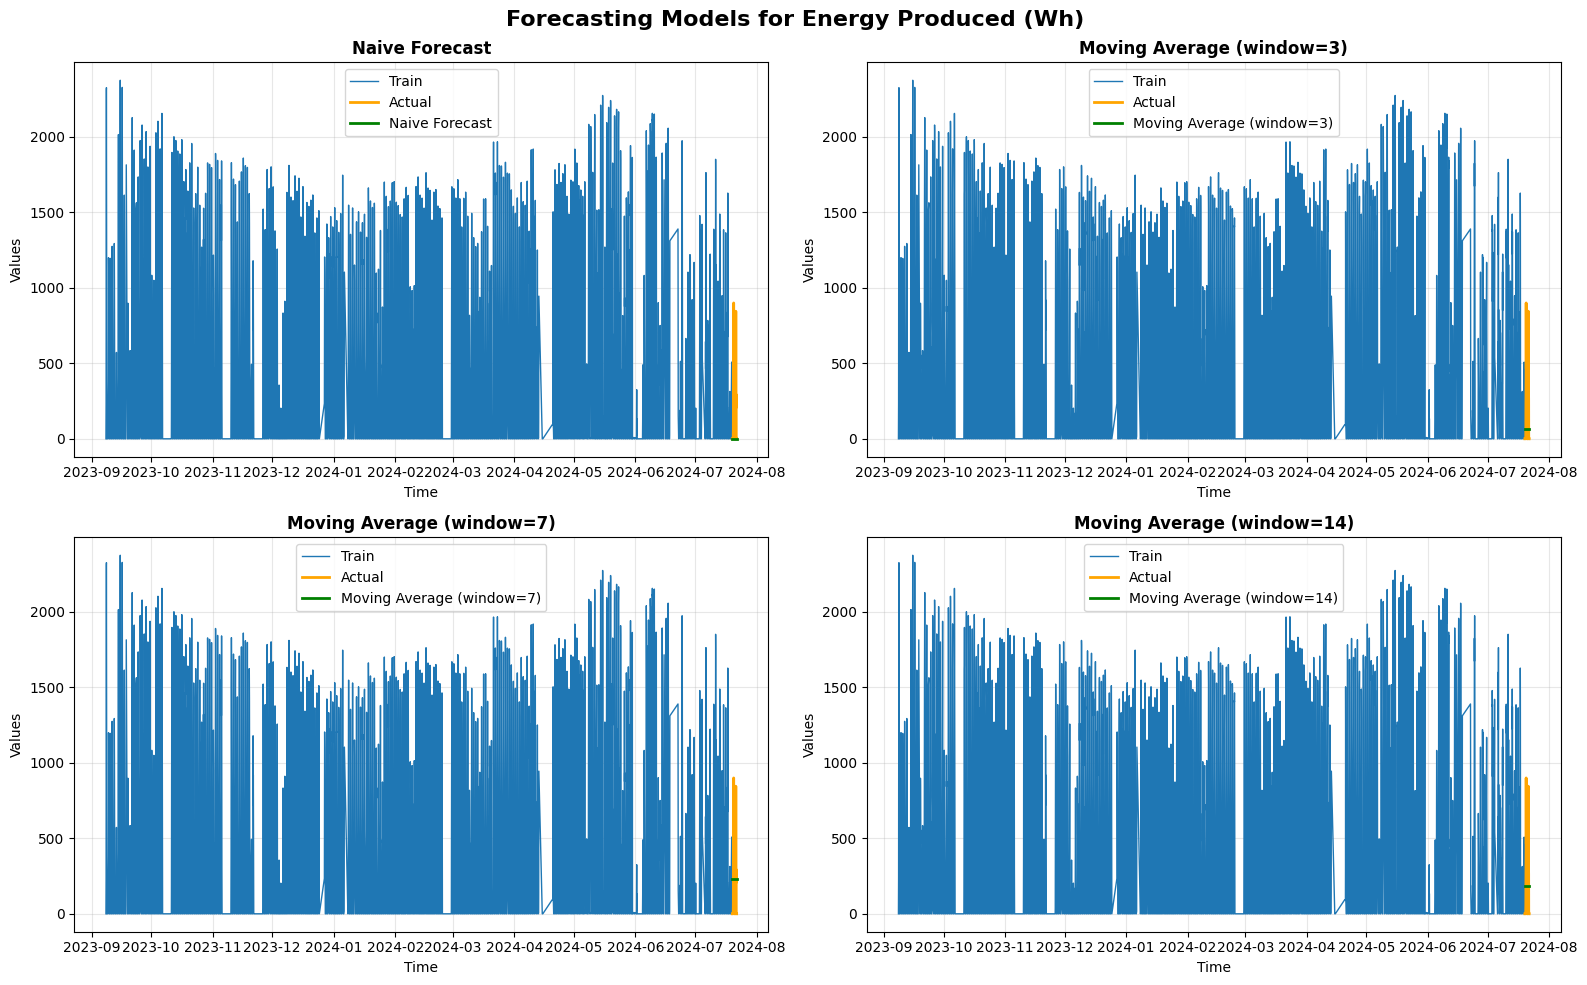


Results for Energy Produced (Wh):
--------------------------------------------------------------------------------
                        Model       MAE      RMSE      R2  SMAPE (%)
0              Naive Forecast  156.0990  297.8162 -0.3694   193.8993
1   Moving Average (window=3)  171.3663  271.3057 -0.1365   169.4171
2   Moving Average (window=7)  235.2046  265.0146 -0.0844   150.3299
3  Moving Average (window=14)  214.7128  255.7322 -0.0097   154.3009
4  Moving Average (window=24)  201.9974  254.6470 -0.0012   158.0666

Forecasting: Energy Consumed (Wh)
Training: Naive Forecast
Training: Moving Average (window=3)
Training: Moving Average (window=7)
Training: Moving Average (window=14)
Training: Moving Average (window=24)


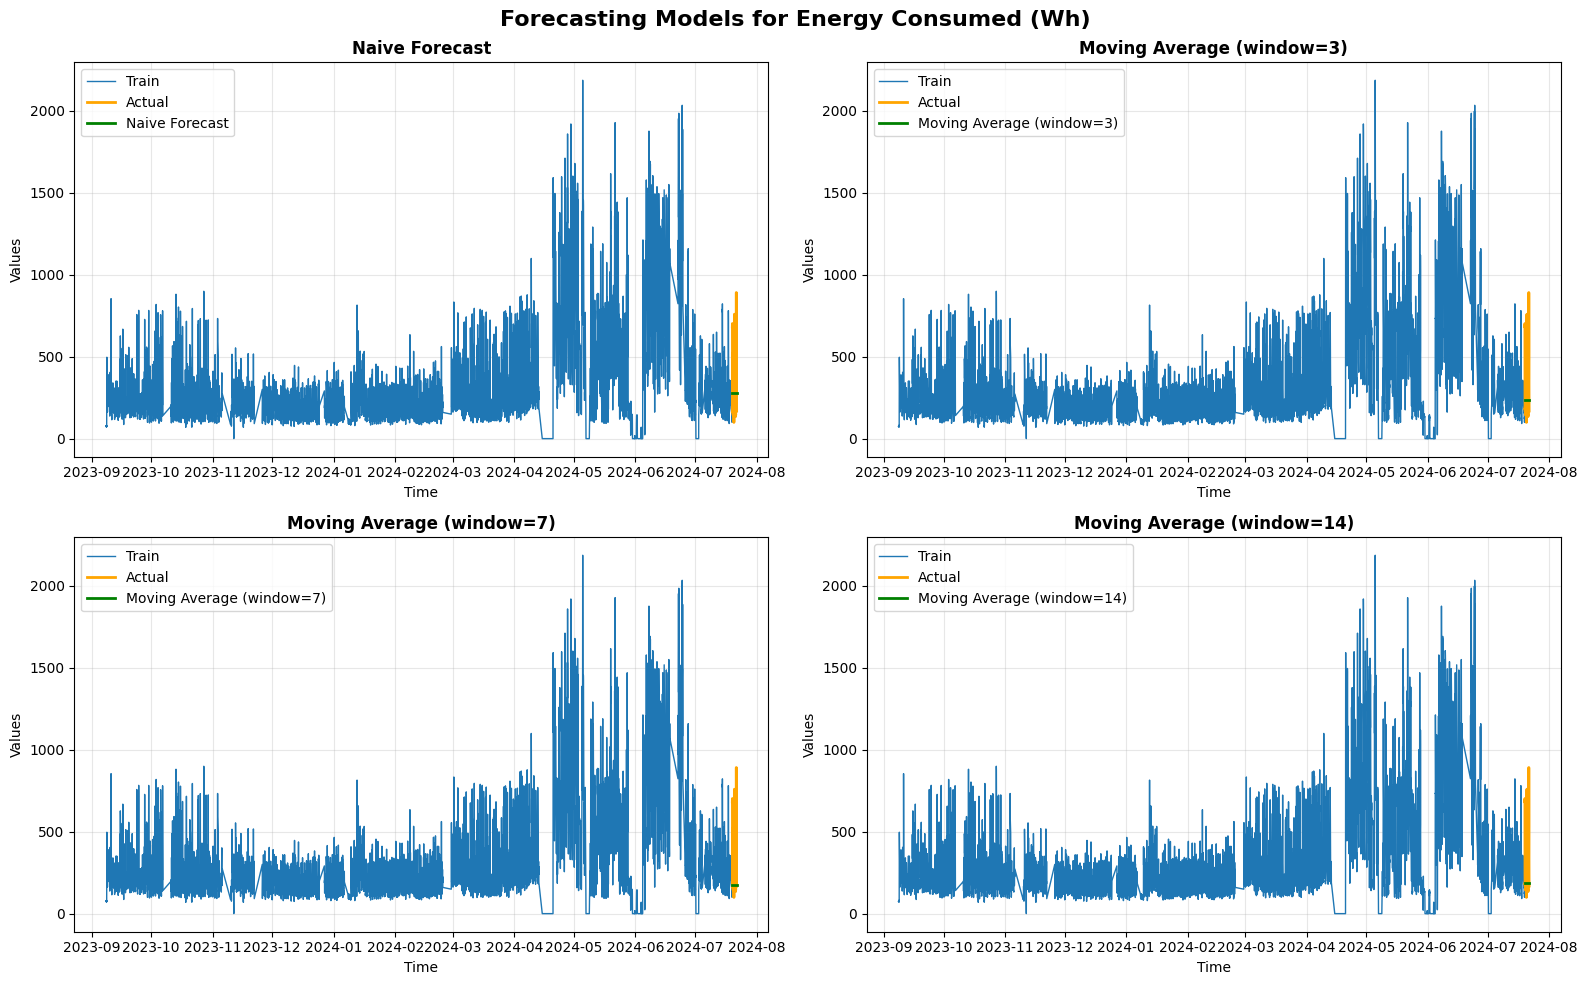


Results for Energy Consumed (Wh):
--------------------------------------------------------------------------------
                        Model       MAE      RMSE      R2  SMAPE (%)
0              Naive Forecast  149.3854  199.2682 -0.0050    48.3070
1   Moving Average (window=3)  136.6389  207.2592 -0.0872    43.2175
2   Moving Average (window=7)  134.9182  231.1213 -0.3520    41.1400
3  Moving Average (window=14)  132.1607  224.7499 -0.2784    40.1256
4  Moving Average (window=24)  133.4466  215.7128 -0.1777    41.3553

Forecasting: net_export_import_grid
Training: Naive Forecast
Training: Moving Average (window=3)
Training: Moving Average (window=7)
Training: Moving Average (window=14)
Training: Moving Average (window=24)


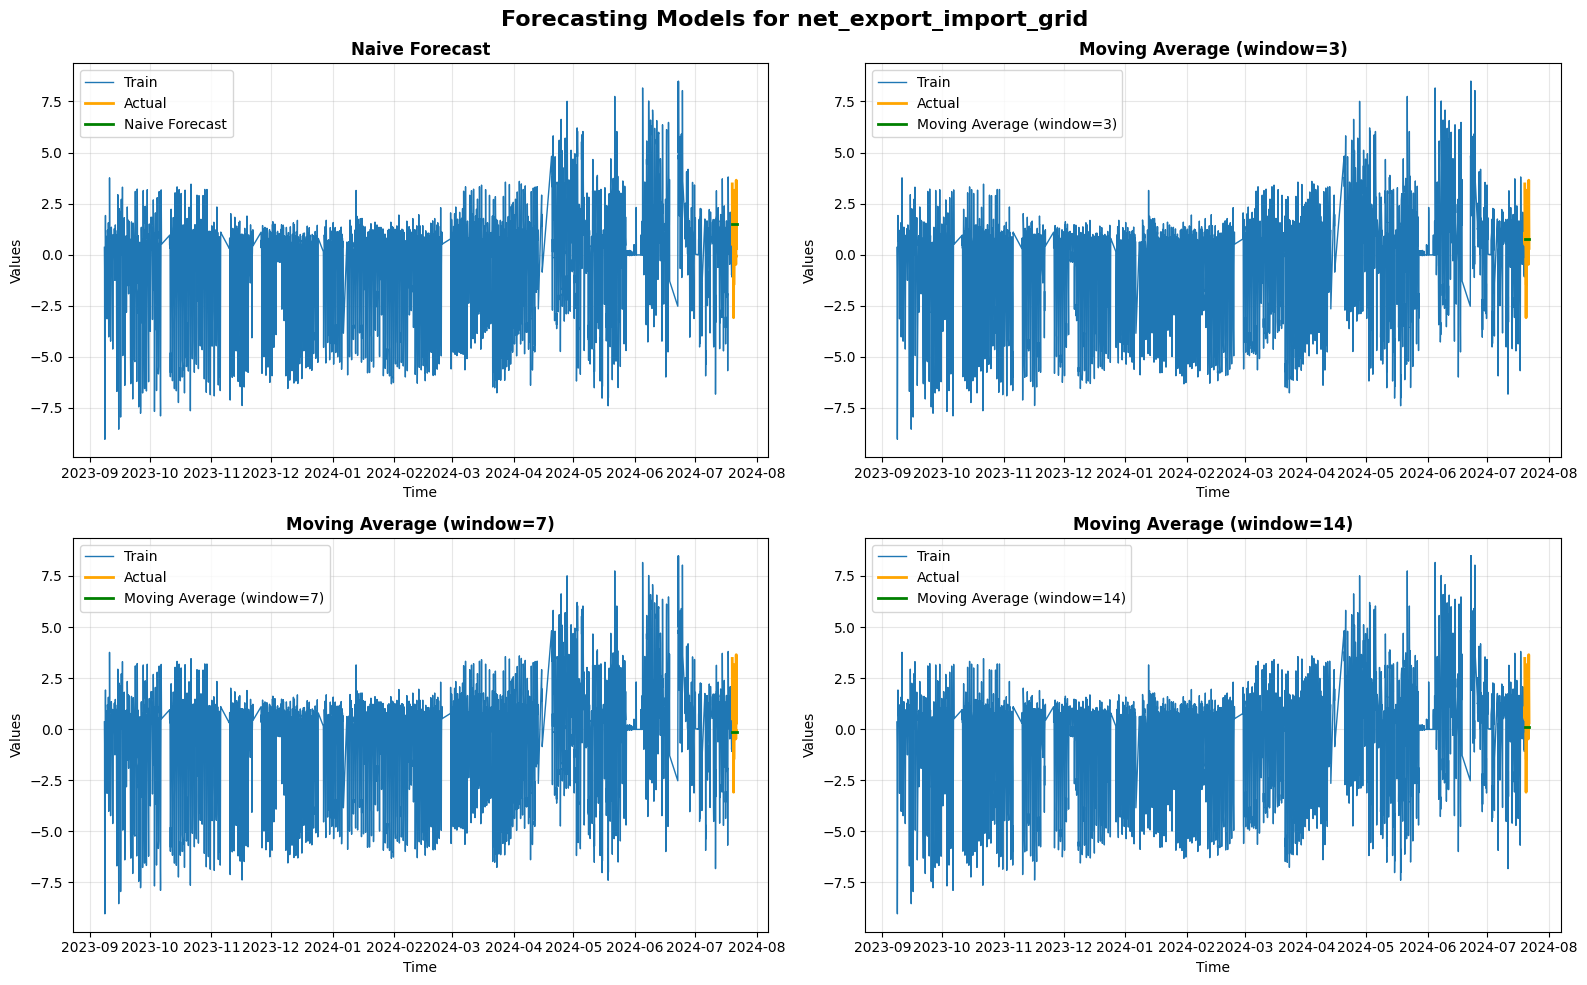


Results for net_export_import_grid:
--------------------------------------------------------------------------------
                        Model     MAE    RMSE      R2  SMAPE (%)
0              Naive Forecast  1.2277  1.4730 -0.3182   108.1126
1   Moving Average (window=3)  0.9686  1.2832 -0.0004   107.7391
2   Moving Average (window=7)  1.1739  1.5605 -0.4795   172.9975
3  Moving Average (window=14)  1.0680  1.4390 -0.2582   169.3799
4  Moving Average (window=24)  0.9960  1.3432 -0.0962   132.1526


In [56]:
# Iterate through targets
for target in targets:
    print(f"\n{'='*50}")
    print(f"Forecasting: {target}")
    print(f"{'='*50}")
    
    # Train/Test Split
    train = df[target][:-forecast_horizon]
    test = df[target][-forecast_horizon:]
    
    # Store forecasts for this target
    forecasts = {}
    target_results = []
    
    # 1.1 Naive Forecast (previous value)
    print("Training: Naive Forecast")
    y_naive = train.iloc[-1]
    y_pred_naive = np.full(len(test), y_naive)
    forecasts['Naive Forecast'] = y_pred_naive
    target_results.append(evaluate_forecast(test.values, y_pred_naive, "Naive Forecast"))
    
    # 1.2 Moving Average with different window sizes
    window_sizes = [3, 7, 14, 24]
    for window in window_sizes:
        print(f"Training: Moving Average (window={window})")
        ma_value = train.iloc[-window:].mean()
        y_pred_ma = np.full(len(test), ma_value)
        forecasts[f'Moving Average (window={window})'] = y_pred_ma
        target_results.append(evaluate_forecast(test.values, y_pred_ma, f"Moving Average (window={window})"))
    
    # Create combined plot for this target
    plot_forecasts(train, test, forecasts, target)
    
    # Display results table for this target
    print(f"\nResults for {target}:")
    print("-" * 80)
    results_df = pd.DataFrame(target_results)
    print(results_df.round(4))
    
    # Store results
    for result in target_results:
        result['Target'] = target
        all_results.append(result)

In [57]:
# Create comprehensive results summary
print(f"\n{'='*80}")
print("COMPREHENSIVE RESULTS SUMMARY")
print(f"{'='*80}")

final_results_df = pd.DataFrame(all_results)
final_results_df = final_results_df[['Target', 'Model', 'MAE', 'RMSE', 'R2', 'SMAPE (%)']]

# Display overall results
print("\nOverall Results:")
final_results_df.round(2)


COMPREHENSIVE RESULTS SUMMARY

Overall Results:


,Target,Model,MAE,RMSE,R2,SMAPE (%)
0,Energy Produced (Wh),Naive Forecast,156.10,297.82,-0.37,193.90
1,Energy Produced (Wh),Moving Average (window=3),171.37,271.31,-0.14,169.42
2,Energy Produced (Wh),Moving Average (window=7),235.20,265.01,-0.08,150.33
3,Energy Produced (Wh),Moving Average (window=14),214.71,255.73,-0.01,154.30
4,Energy Produced (Wh),Moving Average (window=24),202.00,254.65,-0.00,158.07
5,Energy Consumed (Wh),Naive Forecast,149.39,199.27,-0.00,48.31
6,Energy Consumed (Wh),Moving Average (window=3),136.64,207.26,-0.09,43.22
7,Energy Consumed (Wh),Moving Average (window=7),134.92,231.12,-0.35,41.14
8,Energy Consumed (Wh),Moving Average (window=14),132.16,224.75,-0.28,40.13
9,Energy Consumed (Wh),Moving Average (window=24),133.45,215.71,-0.18,41.36
